In [50]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import csv

# Importing and reading CSV file
file_input = 'C:\\Users\\Sneha Rani\\CapstoneProject-LR\\ibm-hr-attrition.csv'
df1 = pd.read_csv(file_input, index_col=None)

# Pre cleaned the dataset by selecting significant columns
df2 = df1[['Age','Attrition','BusinessTravel','Department','DistanceFromHome','Education','EducationField',
           'EnvironmentSatisfaction','Gender','HourlyRate','JobInvolvement','JobRole','JobSatisfaction','MaritalStatus','MonthlyIncome',
           'NumCompaniesWorked','OverTime','PercentSalaryHike','RelationshipSatisfaction','TotalWorkingYears',
           'WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

# Converting strings to categorical values
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
df2['Attrition'] = number.fit_transform(df2['Attrition'].astype('str'))
df2.head()

Populating the interactive namespace from numpy and matplotlib


F:\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['negative', 'number', 'grid']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
F:\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,94,...,8,Yes,11,1,8,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,61,...,1,No,23,4,10,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,Male,92,...,6,Yes,15,2,7,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,56,...,1,Yes,11,3,8,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,1,Male,40,...,9,No,12,4,6,3,2,2,2,2


In [51]:
# Replacing numeric categorical features data with categorical values

grade = {"Education":{1: "Below College", 2:"College", 3:"Bachelor", 4:"Master", 5:"Doctor"},
       "EnvironmentSatisfaction":{1: "Low", 2:"Medium", 3:"High", 4:"Very High"},
       "JobInvolvement":{1:"Low", 2:"Medium", 3:"High", 4:"Very High"}, 
       "JobSatisfaction":{1:"Low", 2:"Medium", 3:"High", 4:"Very High"},  
       "RelationshipSatisfaction":{1:"Low", 2:"Medium", 3:"High", 4:"Very High"},
       "WorkLifeBalance":  {1: "Bad", 2:"Good", 3:"Better", 4:"Best"},
      }
df2.replace(grade, inplace=True)
df2.head()

F:\Anaconda3\lib\site-packages\pandas\core\generic.py:3855: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,College,Life Sciences,Medium,Female,94,...,8,Yes,11,Low,8,Bad,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,Below College,Life Sciences,High,Male,61,...,1,No,23,Very High,10,Better,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,College,Other,Very High,Male,92,...,6,Yes,15,Medium,7,Better,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,Master,Life Sciences,Very High,Female,56,...,1,Yes,11,High,8,Better,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,Below College,Medical,Low,Male,40,...,9,No,12,Very High,6,Better,2,2,2,2


In [52]:
# Creating dummy variables on categorical data for easy interpretation

final_data = pd.get_dummies(df2, columns =['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction',
                                     'Gender', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 
                                     'RelationshipSatisfaction', 'WorkLifeBalance'])
final_data.head()

,Age,Attrition,DistanceFromHome,HourlyRate,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,...,OverTime_No,OverTime_Yes,RelationshipSatisfaction_High,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very High,WorkLifeBalance_Bad,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good
0,41,1,1,94,5993,8,11,8,6,4,...,0,1,0,1,0,0,1,0,0,0
1,49,0,8,61,5130,1,23,10,10,7,...,1,0,0,0,0,1,0,0,1,0
2,37,1,2,92,2090,6,15,7,0,0,...,0,1,0,0,1,0,0,0,1,0
3,33,0,3,56,2909,1,11,8,8,7,...,0,1,1,0,0,0,0,0,1,0
4,27,0,2,40,3468,9,12,6,2,2,...,1,0,0,0,0,1,0,0,1,0


In [53]:
# Move the reponse variable "Attrition" to the front of the table

front = final_data['Attrition']
final_data.drop(labels=['Attrition'], axis=1, inplace = True)
final_data.insert(0, 'Attrition', front)
final_data.head()

,Attrition,Age,DistanceFromHome,HourlyRate,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,...,OverTime_No,OverTime_Yes,RelationshipSatisfaction_High,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very High,WorkLifeBalance_Bad,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good
0,1,41,1,94,5993,8,11,8,6,4,...,0,1,0,1,0,0,1,0,0,0
1,0,49,8,61,5130,1,23,10,10,7,...,1,0,0,0,0,1,0,0,1,0
2,1,37,2,92,2090,6,15,7,0,0,...,0,1,0,0,1,0,0,0,1,0
3,0,33,3,56,2909,1,11,8,8,7,...,0,1,1,0,0,0,0,0,1,0
4,0,27,2,40,3468,9,12,6,2,2,...,1,0,0,0,0,1,0,0,1,0


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale

# Defining the first parameter 

X = final_data.iloc[:, 1:65].values
print("X: ", type(X), X.shape)

X:  <class 'numpy.ndarray'> (1470, 64)


In [55]:
# Defining the second parameter 

y = final_data.iloc[:, 0].values
print("y: ", type(y), y.shape)

y:  <class 'numpy.ndarray'> (1470,)


In [56]:
final_data['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

### Logistic Regression Base Line Model using 'L2' regularization

In [57]:
# Split the data into training and test sets
# Stratify parameter makes a split so that proportion of values in the sample produced will be same as proportion of values
# provided to parameter stratify.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50, stratify=y)

# Build the Logistic Regression Model using default 'L2' regularization

classifier = LogisticRegression()

# Fit the model on the trainng data.
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [58]:
# Print the accuracy from the testing data.
y_predict_test = classifier.predict(X_test)
print("\n")
print("[Test] Accuracy score:" ,accuracy_score(y_predict_test, y_test))

# Print the accuracy from the training data.
y_predict_train = classifier.predict(X_train)
print("\n")
print("[Training] Accuracy score:" ,accuracy_score(y_predict_train, y_train))



[Test] Accuracy score: 0.872282608696


[Training] Accuracy score: 0.895644283122


In [59]:
# Classification report using 'L2' regularization 

from sklearn.metrics import classification_report
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

print("[Training Classification Report:]")
print(classification_report(y_train, y_predict_train))

print("[Test Classification Report:]")
print(classification_report(y_test, y_predict_test))

[Training Classification Report:]
             precision    recall  f1-score   support

          0       0.90      0.98      0.94       924
          1       0.82      0.46      0.58       178

avg / total       0.89      0.90      0.88      1102

[Test Classification Report:]
             precision    recall  f1-score   support

          0       0.89      0.96      0.93       309
          1       0.68      0.39      0.49        59

avg / total       0.86      0.87      0.86       368



### Logistic Regression Base Line Model using 'L1' regularization

In [60]:
# Build the Logistic Regression Model using 'L1' regularization
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

classifier_1 = LogisticRegression(penalty = 'l1')

# Fit the model on the trainng data.
classifier_1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [61]:
# Checking the model's accuracy from the testing data.
y_predict_test_1 = classifier_1.predict(X_test)
print("\n")
print("[Test] Accuracy score:" ,accuracy_score(y_predict_test_1, y_test))

# Checking the model's accuracy from the training data.
y_predict_train_1 = classifier_1.predict(X_train)
print("\n")
print("[Training] Accuracy score:" ,accuracy_score(y_predict_train_1, y_train))



[Test] Accuracy score: 0.872282608696


[Training] Accuracy score: 0.893829401089


In [62]:
# Classification report using 'L1' regularization 

from sklearn.metrics import classification_report
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

print("[Training Classification Report:]")
print(classification_report(y_train, y_predict_train_1))

print("[Test Classification Report:]")
print(classification_report(y_test, y_predict_test_1))

[Training Classification Report:]
             precision    recall  f1-score   support

          0       0.90      0.98      0.94       924
          1       0.82      0.44      0.57       178

avg / total       0.89      0.89      0.88      1102

[Test Classification Report:]
             precision    recall  f1-score   support

          0       0.89      0.96      0.93       309
          1       0.68      0.39      0.49        59

avg / total       0.86      0.87      0.86       368



##  Finding resulting model "M"  using best hyper-parameter and corresponding penalty

From the Logistic Regression Base Line Model using 'L1' and 'L2' regularization done earlier, we see in classification report that the performance metric using penalty 'L1' is more or less same of 'L2' but while comparing recall value we see that 'L2' is better as it has slightly higher recall value than 'L1' in training data classification report.

So, we choose penalty 'L2' which is default one for Logistic Regression and further tune the model using best hyperparameter.

** Best Hyperparameter Tuning using GridSearchCV in scikit-learn using 'L2' **

In [63]:
# Trying to estimate how this model will predict on unseen data by tuning the model

from sklearn.grid_search import GridSearchCV
Cs = [0.001, 0.1, 1, 10, 100]
param_grid = dict(C=Cs)
print(param_grid)

{'C': [0.001, 0.1, 1, 10, 100]}


In [64]:
# instantiate the grid
classifier_gcv = LogisticRegression()
grid = GridSearchCV(classifier_gcv, param_grid, scoring='accuracy')

In [65]:
# Fit the model on the trainng data.
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, scoring='accuracy', verbose=0)

In [66]:
grid.grid_scores_

[mean: 0.83938, std: 0.00205, params: {'C': 0.001},
 mean: 0.86298, std: 0.01018, params: {'C': 0.1},
 mean: 0.86751, std: 0.00902, params: {'C': 1},
 mean: 0.86570, std: 0.00937, params: {'C': 10},
 mean: 0.86661, std: 0.01164, params: {'C': 100}]

In [67]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.867513611615245
{'C': 1}
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


*After analyzing the performance of L1 and L2 regularization and applying best hyper-parameter found using GridSearch, we create **resulting model 'M'** which identify the best combination of **penalty = 'L2'** (default) and the value of **C = '1'**.*

In [177]:
M = LogisticRegression(C=1)
M.fit(X_train, y_train)
print(accuracy_score(M.predict(X_test), y_test))

0.872282608696


In [178]:
# Classification report using 'L2' regularization 

from sklearn.metrics import classification_report
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

print("[Training Classification Report:]")
print(classification_report(y_train, M.predict(X_train)))

print("[Test Classification Report:]")
print(classification_report(y_test, M.predict(X_test)))

[Training Classification Report:]
             precision    recall  f1-score   support

          0       0.90      0.98      0.94       924
          1       0.82      0.46      0.58       178

avg / total       0.89      0.90      0.88      1102

[Test Classification Report:]
             precision    recall  f1-score   support

          0       0.89      0.96      0.93       309
          1       0.68      0.39      0.49        59

avg / total       0.86      0.87      0.86       368



# Trying Different Algorithms 

### 1. Using Random Forest Classifier

In [179]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
# Print the accuracy from the testing data.
print('Random Forest Accuracy: {:.2f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.86


### 2. Using Decision Tree Classifier (CART)

In [180]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
# Print the accuracy from the testing data.
print('Decision Tree Accuracy(CART): {:.2f}'.format(accuracy_score(y_test, dtree.predict(X_test))))

Decision Tree Accuracy(CART): 0.79


### 3. Using AdaBoost Classifier

In [181]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
# Print the accuracy from the testing data.
print('AdaBoost Accuracy: {:.2f}'.format(accuracy_score(y_test, ada.predict(X_test))))

AdaBoost Accuracy: 0.87


### Preparing Comparison Table Results using different Algorithms

In [182]:
from sklearn.metrics import precision_recall_fscore_support as score

print('All Results across Models on Test Dataset')
print('-------------------------------------------------------------------------------')
print('Name    Class     Precision             Recall                Fscore    Support')
report = []
report.append(('LR   ',M))
report.append(('ADA  ',ada))
report.append(('DTREE',dtree))
report.append(('RF   ',rf))

for name, model in report:
    precision, recall, fscore, support = score(y_test, model.predict(X_test))
    message = "%s: %s %s %s %s %s " % (name, 'Class 0', format(precision[0]), format(recall[0]), format(fscore[0]), format(support[0]))
    message_1 = "%s: %s %s %s %s %s " % (name, 'Class 1', format(precision[1]), format(recall[1]), format(fscore[1]), format(support[1]))
    print(message)
    print(message_1)
    print('\n')

All Results across Models on Test Dataset
-------------------------------------------------------------------------------
Name    Class     Precision             Recall                Fscore    Support
LR   : Class 0 0.8922155688622755 0.9644012944983819 0.9269051321928461 309 
LR   : Class 1 0.6764705882352942 0.3898305084745763 0.49462365591397844 59 


ADA  : Class 0 0.9012345679012346 0.9449838187702265 0.9225908372827805 309 
ADA  : Class 1 0.6136363636363636 0.4576271186440678 0.5242718446601942 59 


DTREE: Class 0 0.8794788273615635 0.8737864077669902 0.8766233766233764 309 
DTREE: Class 1 0.36065573770491804 0.3728813559322034 0.3666666666666667 59 


RF   : Class 0 0.8599439775910365 0.9935275080906149 0.921921921921922 309 
RF   : Class 1 0.8181818181818182 0.15254237288135594 0.2571428571428571 59 




# ROC Graph using Different Models

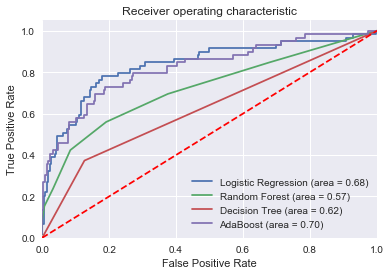

In [183]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, M.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, M.predict_proba(X_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])


dtree_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])

ada_roc_auc = roc_auc_score(y_test, ada.predict(X_test))
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test, ada.predict_proba(X_test)[:,1])


plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dtree_roc_auc)
plt.plot(ada_fpr, ada_tpr, label='AdaBoost (area = %0.2f)' % ada_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

*From the above ROC Graph, we see AdaBoost Model has highest area under curve value of 0.70 and it is closest to the top left corner which is one of the criteria for a good model. Next good model as per ROC curve is the Logistic Regression model.*

In [184]:
from sklearn.metrics import recall_score
print('Recall Results across Models')
print('----------------------------')
report = []
report.append(('LR   ',M))
report.append(('ADA  ',ada))
report.append(('DTREE',dtree))
report.append(('RF   ',rf))

for name, model in report:
    message = "%s:                 %f " % (name, recall_score(y_test, model.predict(X_test)))
    print (message)
#print(recall_score(y_test, ada.predict(X_test)))

Recall Results across Models
----------------------------
LR   :                 0.389831 
ADA  :                 0.457627 
DTREE:                 0.372881 
RF   :                 0.152542 


*Based on the above results across different models, we see that the AdaBoost has the highest recall score.When an employee left the company, how often the model predict that correctly depends on the "recall" score.*

*High recall score means when employees left the company, model predicted correctly most of the time.*

*A good recall score is important to avoid unpredicted loss of the employees in the company.*

# Feature Importance using resulting logistic regression model 'M'


In [185]:
# Using Scikit-Learn to find Coefficient with indices
df_coefs = pd.DataFrame(M.coef_[0], index= final_data.iloc[:, 1:65].columns, columns=['Coefficient'])
# Sorting Coefficient in descending order
df_sorted = df_coefs.sort_values('Coefficient', ascending= False)
print(df_sorted)

                                    Coefficient
OverTime_Yes                           1.105801
JobInvolvement_Low                     0.965035
MaritalStatus_Single                   0.874477
EnvironmentSatisfaction_Low            0.869302
RelationshipSatisfaction_Low           0.850258
JobSatisfaction_Low                    0.761273
BusinessTravel_Travel_Frequently       0.669466
JobRole_Sales Representative           0.650355
WorkLifeBalance_Bad                    0.648171
JobRole_Laboratory Technician          0.575997
EducationField_Technical Degree        0.521560
Education_Bachelor                     0.342879
JobRole_Human Resources                0.320819
EducationField_Marketing               0.302172
Gender_Male                            0.296724
EducationField_Human Resources         0.279759
Department_Human Resources             0.268402
Department_Sales                       0.222793
NumCompaniesWorked                     0.194319
YearsSinceLastPromotion                0

In [186]:
# Separate and sort the positive and negative ones coefficients by absolute value

# Function for seperating positive and negative Coefficient
# Ref: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html 

def positive(value):
    return max(value, 0)

def negative(value):
    return min(value, 0)
# Map value of 'df_sorted' using input function 'positive'
df_sorted['positive'] = df_sorted['Coefficient'].map(positive)
# Map value of 'df_sorted' using input function 'negative'
df_sorted['negative'] = df_sorted['Coefficient'].map(negative)
# Get absolute value of negative coefficients 
df_sorted['negative_abs'] = df_sorted['negative'].abs()

In [187]:
# Top 5 positive coefficients
df_positive_top_5 = df_sorted.nlargest(5,'positive')
df_positive_top_5_filter = df_positive_top_5['positive']
df_positive_top_5_filter

OverTime_Yes                    1.105801
JobInvolvement_Low              0.965035
MaritalStatus_Single            0.874477
EnvironmentSatisfaction_Low     0.869302
RelationshipSatisfaction_Low    0.850258
Name: positive, dtype: float64

In [188]:
# Top 5 negative coefficients
df_negative_top_5 = df_sorted.nlargest(5,'negative_abs')
df_negative_top_5_filter = df_negative_top_5['negative_abs']
df_negative_top_5_filter

OverTime_No                  0.965188
JobSatisfaction_Very High    0.701842
BusinessTravel_Non-Travel    0.630154
JobInvolvement_Very High     0.606149
WorkLifeBalance_Better       0.584350
Name: negative_abs, dtype: float64

From the above feature importance analysis report, we see that features like OverTime_Yes, JobInvolvement_Low with the high positive coefficients (towards attrition) makes some sense and are somewhat correlated to the things which influence employees to leave the company in short duration of time.

On the other hands, we also see that the features like OverTime_No, JobSatisfaction_Very High, JobInvolvement_Very High with high (absolute value) negative coefficients (towards non-attrition) makes sense too and are somewhat correlated to the things which influence employees to stay at the company for the longer duration of time.

In short, we can say that model has good understandability.

### Note:-  Feature Importance


Ref: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3648438/
        
**Based on the referral, I decided to find feature importance on Imbalanced dataset before applying SMOTE as oversampling the minority class with SMOTE violates the independence assumption.**       

**1.**The one with the negative coefficient having the highest absolute weighted value will contribute the most important    feature as belonging to class 0 (employees who have not left the company).

**2.**The one with the positive coefficient having the highest absolute weighted value  will contribute the most important feature as belonging to class 1 (employees who have left the company).

### Summary  Report for Imbalanced Dataset :-

From the above work done, I can say that best model is Adaboost regression model with recall score of 0.46. Also, the training performance is better than test performance which does indicate that model is neither over-fitting nor erroneous.

Logistic Regression Model 'M' also has same accuracy but the ADAboost Model has better AUC and Recall value so I have chosen Adaboost as the model for this Dataset. 

However, Class 1 (minority class) recall and F1 score are not so good when compared to Class 0 (majority) recall and F1 score. This means that Class 0 (majority class) data has overinfluenced the model.

So to overcome the Imbalance in the training Dataset, I am going to apply SMOTE to get equal Class 0 and Class 1 samples.


# Balance the dataset using SMOTE

*Next I will use **SMOTE(Synthetic Minority Over-sampling Technique)** algorithm to combat Imbalanced Classes in my Machine Learning Dataset and test the model based on the modified data sample.*

In [95]:
# Count the number of occurrence of the list items

from collections import Counter
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_sm, y_train_sm = sm.fit_sample(X_train,y_train)
print('Rebalanced Dataset {}'.format(Counter(y_train_sm)))

Rebalanced Dataset Counter({0: 924, 1: 924})


### Logistic Regression on Balance Dataset using 'L2' regularization

In [171]:
# Logistic Regression on Balance Dataset
classifier_sm = LogisticRegression()
classifier_sm.fit(X_train_sm, y_train_sm)

print("[Train Classification Report:]")
print(classification_report(y_train_sm, classifier_sm.predict(X_train_sm)))
print("[Test Classification Report:]")
print(classification_report(y_test, classifier_sm.predict(X_test)))

[Train Classification Report:]
             precision    recall  f1-score   support

          0       0.82      0.81      0.82       924
          1       0.82      0.82      0.82       924

avg / total       0.82      0.82      0.82      1848

[Test Classification Report:]
             precision    recall  f1-score   support

          0       0.94      0.81      0.87       309
          1       0.42      0.73      0.53        59

avg / total       0.86      0.79      0.81       368



### Logistic Regression on Balance Dataset using 'L1' regularization

In [172]:
# Logistic Regression on Balance Dataset
classifier_sm_1 = LogisticRegression(penalty = 'l1')
classifier_sm_1.fit(X_train_sm, y_train_sm)

print("[Train Classification Report:]")
print(classification_report(y_train_sm, classifier_sm_1.predict(X_train_sm)))
print("[Test Classification Report:]")
print(classification_report(y_test, classifier_sm_1.predict(X_test)))

[Train Classification Report:]
             precision    recall  f1-score   support

          0       0.82      0.81      0.82       924
          1       0.81      0.83      0.82       924

avg / total       0.82      0.82      0.82      1848

[Test Classification Report:]
             precision    recall  f1-score   support

          0       0.95      0.79      0.86       309
          1       0.41      0.76      0.54        59

avg / total       0.86      0.79      0.81       368



*From the above performance metric report, 'L1' regularization has better recall and overall precissn than 'L2' regularization.
Now based on above score , I will apply hyper-parameter tuning using GridSearchCV on balanced dataset.*

**Note:**

As seen from above analysis report, Logistic Regression model uisng 'L2' regularization on balanced dataset shows better recall score than the model trained on imbalanced dataset.

##  Finding resulting model "M1"  using best hyper-parameter and corresponding penalty

From the Logistic Regression Base Line Model using 'L1' and 'L2' regularization done earlier, we see in classification report that the performance metric using penalty 'L1' is more or less same of 'L2' but while comparing recall value we see that 'L1' is better as it has slightly higher recall value than 'L2' in training data classification report.

So, we choose penalty 'L1' which for Logistic Regression and further tune the model using best hyperparameter.

**Best Hyperparameter Tuning using GridSearchCV in scikit-learn using 'L1'**

In [165]:
# Trying to estimate how this model will predict on unseen data by tuning the model

from sklearn.grid_search import GridSearchCV
Cs = [0.001, 0.1, 1, 10, 100]
param_grid = dict(C=Cs)
print(param_grid)

{'C': [0.001, 0.1, 1, 10, 100]}


In [166]:
# instantiate the grid
classifier_gcv = LogisticRegression(penalty = 'l1')
grid_sm = GridSearchCV(classifier_gcv, param_grid, scoring='accuracy')

In [167]:
# Fit the model on the trainng data using SMOTE
grid_sm.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, scoring='accuracy', verbose=0)

In [168]:
grid_sm.grid_scores_

[mean: 0.60227, std: 0.01377, params: {'C': 0.001},
 mean: 0.79058, std: 0.01085, params: {'C': 0.1},
 mean: 0.79816, std: 0.01203, params: {'C': 1},
 mean: 0.79978, std: 0.00940, params: {'C': 10},
 mean: 0.79978, std: 0.01071, params: {'C': 100}]

In [169]:
# examine the best model
print(grid_sm.best_score_)
print(grid_sm.best_params_)
print(grid_sm.best_estimator_)

0.7997835497835498
{'C': 10}
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


*After analyzing the performance of L1 and L2 regularization and applying best hyper-parameter found using GridSearch on balanced dataset using SMOTe, we create **resulting model 'M1'** which identify the best combination of **penalty = 'L1'** (default) and the value of **C = '10'**.*

In [170]:
M1 = LogisticRegression(penalty = 'l1', C=10)
M1.fit(X_train_sm, y_train_sm)

# Classification report using 'L1' regularization 

from sklearn.metrics import classification_report
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

print("[Training Classification Report:]")
print(classification_report(y_train_sm, M1.predict(X_train_sm)))

print("[Test Classification Report:]")
print(classification_report(y_test, M1.predict(X_test)))

[Training Classification Report:]
             precision    recall  f1-score   support

          0       0.82      0.81      0.82       924
          1       0.81      0.83      0.82       924

avg / total       0.82      0.82      0.82      1848

[Test Classification Report:]
             precision    recall  f1-score   support

          0       0.94      0.80      0.86       309
          1       0.41      0.71      0.52        59

avg / total       0.85      0.79      0.81       368



# Trying Different Algorithms on Balanced Dataset using SMOTE 

### 1. Using Random Forest Classifier

In [114]:
from sklearn.ensemble import RandomForestClassifier
rf_sm = RandomForestClassifier()
rf_sm.fit(X_train_sm, y_train_sm)
# Print the accuracy from the testing data.
print('Random Forest Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_sm.predict(X_test))))

Random Forest Accuracy: 0.86


### 2. Using Decision Tree Classifier (CART)

In [118]:
from sklearn.tree import DecisionTreeClassifier
dtree_sm = DecisionTreeClassifier()
dtree_sm.fit(X_train_sm, y_train_sm)
# Print the accuracy from the testing data.
print('Decision Tree Accuracy(CART): {:.2f}'.format(accuracy_score(y_test, dtree_sm.predict(X_test))))

Decision Tree Accuracy(CART): 0.75


### 3. Using AdaBoost Classifier

In [119]:
from sklearn.ensemble import AdaBoostClassifier
ada_sm = AdaBoostClassifier()
ada_sm.fit(X_train_sm, y_train_sm)
# Print the accuracy from the testing data.
print('AdaBoost Accuracy: {:.2f}'.format(accuracy_score(y_test, ada_sm.predict(X_test))))
print("[Test Classification Report:]")
print(classification_report(y_test, ada_sm.predict(X_test)))

AdaBoost Accuracy: 0.86
[Test Classification Report:]
             precision    recall  f1-score   support

          0       0.90      0.93      0.92       309
          1       0.56      0.47      0.51        59

avg / total       0.85      0.86      0.85       368



### Preparing Comparison Table Results using different Algorithms using SMOTE

In [157]:
from sklearn.metrics import precision_recall_fscore_support as score

print('All Results across Models on Test Dataset using SMOTE')
print('-------------------------------------------------------------------------------')
print('Name    Class     Precision             Recall                Fscore    Support')
report_sm = []
report_sm.append(('LR   ',M1))
report_sm.append(('ADA  ',ada_sm))
report_sm.append(('DTREE',dtree_sm))
report_sm.append(('RF   ',rf_sm))

for name, model in report_sm:
    precision, recall, fscore, support = score(y_test, model.predict(X_test))
    message = "%s: %s %s %s %s %s " % (name, 'Class 0', format(precision[0]), format(recall[0]), format(fscore[0]), format(support[0]))
    message_1 = "%s: %s %s %s %s %s " % (name, 'Class 1', format(precision[1]), format(recall[1]), format(fscore[1]), format(support[1]))
    print(message)
    print(message_1)
    print('\n')

All Results across Models on Test Dataset using SMOTE
-------------------------------------------------------------------------------
Name    Class     Precision             Recall                Fscore    Support
LR   : Class 0 0.9358490566037736 0.8025889967637541 0.8641114982578397 309 
LR   : Class 1 0.4077669902912621 0.711864406779661 0.5185185185185185 59 


ADA  : Class 0 0.9025157232704403 0.9288025889967637 0.9154704944178629 309 
ADA  : Class 1 0.56 0.4745762711864407 0.5137614678899083 59 


DTREE: Class 0 0.862876254180602 0.8349514563106796 0.8486842105263158 309 
DTREE: Class 1 0.2608695652173913 0.3050847457627119 0.28125 59 


RF   : Class 0 0.8657142857142858 0.9805825242718447 0.9195751138088013 309 
RF   : Class 1 0.6666666666666666 0.2033898305084746 0.3116883116883117 59 




# ROC Graph using Different Models using SMOTE

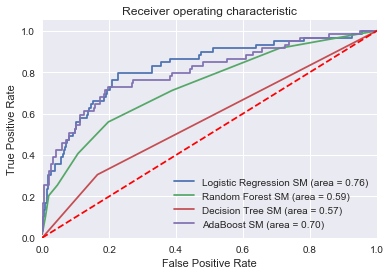

In [158]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, M1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, M1.predict_proba(X_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, rf_sm.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_sm.predict_proba(X_test)[:,1])


dtree_roc_auc = roc_auc_score(y_test, dtree_sm.predict(X_test))
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dtree_sm.predict_proba(X_test)[:,1])

ada_roc_auc = roc_auc_score(y_test, ada_sm.predict(X_test))
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test, ada_sm.predict_proba(X_test)[:,1])


plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression SM (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest SM (area = %0.2f)' % rf_roc_auc)
plt.plot(dt_fpr, dt_tpr, label='Decision Tree SM (area = %0.2f)' % dtree_roc_auc)
plt.plot(ada_fpr, ada_tpr, label='AdaBoost SM (area = %0.2f)' % ada_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

*From the above ROC Graph, we see Logistic Regression Model has highest area under curve value of 0.76 using SMOTE and it is closest to the top left corner which is one of the criteria for a good model.*

In [155]:
from sklearn.metrics import recall_score
print('Recall Results across Models on SMOTE train Dataset')
print('---------------------------------------------------')
report_sm = []
report_sm.append(('LR   ',M1))
report_sm.append(('ADA  ',ada_sm))
report_sm.append(('DTREE',dtree_sm))
report_sm.append(('RF   ',rf_sm))

for name, model in report_sm:
    message = "%s:                 %f " % (name, recall_score(y_test, model.predict(X_test)))
    print (message)
#print(recall_score(y_test, ada.predict(X_test)))

Recall Results across Models on SMOTE train Dataset
---------------------------------------------------
LR   :                 0.711864 
ADA  :                 0.474576 
DTREE:                 0.305085 
RF   :                 0.203390 


*Based on the above results across different models, we see that the Logistic Regression has the highest recall score. When an employee left the company, how often the model predict that correctly depends on the "recall" score.*

*High recall score means when employees left the company, model predicted correctly most of the time.*

*A good recall score is important to avoid unpredicted loss of the employees in the company.*

### Summary  Report for Balanced Dataset using SMOTE :-

From the above work done, Based on recall score ,I see that best model has changed to M1 model which is a Logistic Regression model with tuning parameter C=10.

Adaboost Model which was the best model on Imbalanced Dataset is second best model as it has lower recall value when applied on Balanced Dataset.